In [423]:
import numpy as np
import matplotlib.pyplot as plt


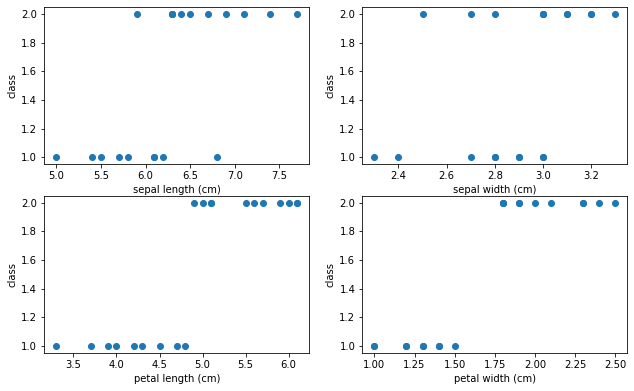

In [435]:
# Load dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X, y = data.data, data.target
feature_names=data.feature_names

X = X[y>0 ,:]
y = y[y > 0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 80)


def price_single_feature_ploting(input_data, target, feature_names):
    fig, axes = plt.subplots(2, 2, figsize = (12, 8))
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.7)
    for index, (ax, feature_name) in enumerate(zip(axes.flat,feature_names)): 
        ax.scatter(input_data[:, index], target)
        ax.set(xlabel = feature_name, ylabel = 'class')

#plot train_data
price_single_feature_ploting(X_train, y_train, feature_names)


In [436]:
# Define classification model

weight = np.zeros((X_train.shape[1]+1,1))
print(weight)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [437]:
def sigmoid(s):
  return 1/(1+np.exp(-s))

In [438]:
def pred(X,w):
  s=np.dot(X, w[1:])+w[0]
  return sigmoid(s) > 0.5

In [439]:
# Define evaluation metrics
def accuracy(X, Y, weight):
    count = 0
    for i in range(len(Y)):
        if pred(X[i], weight) == Y[i]:
            count += 1
        
    return count/len(Y) * 100


In [440]:
# Hyperparameters
# learning rate
alpha = 1e-2
# epochs
epoch = 10000

In [441]:
# Train the model.¶
def logistic_sigmoid_regression(Xtrain, y_train, alpha, epoch, w_init):
  # X_train + bias
  X_train = np.concatenate((np.ones(( Xtrain.shape[0],1)), Xtrain), axis = 1)
  
  w = [w_init]    
  N = X_train.shape[0]
  d = X_train.shape[1]
  for i in range(epoch):
      # random chi so  
      mix_id = np.random.permutation(N)
      for i in mix_id:
          xi = X_train[i].reshape(d, 1)
          yi = y_train[i]
          zi = sigmoid(np.dot(w[-1].T, xi))
          w_new = w[-1] + alpha*(yi - zi)*xi 
          # w[-1] = w[-2]-learningrate*loss(w)' 
          w.append(w_new)
  return w


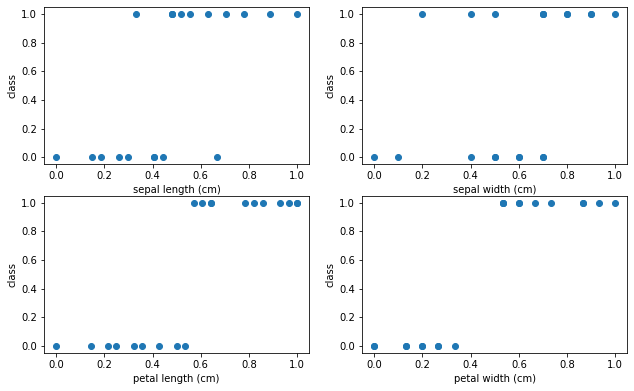

In [445]:
# Data normalization

# Rescaling [0,1]

def RescalingX(X):  
  min_X = np.array([np.min(X[:, i]) for i in range(X.shape[1])])
  max_X = np.array([np.max(X[:, i]) for i in range(X.shape[1])])
  return np.array([(X[i] - min_X)/(max_X - min_X) for i in range(X.shape[0])])
  

def Rescalingy(y):
  return (y - np.min(y))/(np.max(y) - np.min(y))
  

X_train1 = RescalingX(X_train)
y_train1 = Rescalingy(y_train)
X_test1 = RescalingX(X_test)
y_test1 =Rescalingy(y_test)
price_single_feature_ploting(X_train, y_train, feature_names)

In [452]:
w=logistic_sigmoid_regression(X_train1, y_train1, alpha, epoch ,weight)
print(w[-1])

[[-9.4676612 ]
 [-0.32266051]
 [-2.66145648]
 [ 8.58526982]
 [15.63798388]]


In [454]:
print('training set accuracy :',accuracy(X_train1, y_train1, w[-1]),'%')
print('test set accuracy :',accuracy(X_test1, y_test1, w[-1]),'%')

training set accuracy : 100.0 %
test set accuracy : 92.5 %


In [456]:
# (Optional) How low can you go?

w1=w[-1]
best=accuracy(X_test1, y_test1, w[-1])

for i in range(10): 
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 80)
  X_train = RescalingX(X_train)
  y_train = Rescalingy(y_train)
  X_test = RescalingX(X_test)
  y_test =Rescalingy(y_test)
  w=logistic_sigmoid_regression(X_train, y_train, alpha, epoch ,weight)
  if accuracy(X_test, y_test, w[-1])>best:
    best = accuracy(X_test, y_test, w[-1])
    print(w[-1])
    print('training set accuracy :',accuracy(X_train, y_train, w[-1]),'%')
    print('test set accuracy :',accuracy(X_test, y_test, w[-1]),'%')
    print('\n')    



[[-11.12675351]
 [ -1.02568067]
 [ -3.02581081]
 [ 12.47173295]
 [ 10.77516542]]
training set accuracy : 95.0 %
test set accuracy : 90.0 %


[[-9.85434811]
 [-0.14219328]
 [-0.79849736]
 [14.45000669]
 [ 9.38411247]]
training set accuracy : 100.0 %
test set accuracy : 93.75 %


[[-8.66131071]
 [-3.91455803]
 [-1.71057641]
 [12.75308675]
 [10.65871057]]
training set accuracy : 90.0 %
test set accuracy : 97.5 %


[[-9.88235203]
 [-2.1988743 ]
 [-2.05898785]
 [11.76037616]
 [14.10544352]]
training set accuracy : 100.0 %
test set accuracy : 98.75 %


